In [1]:
from kunal import *

In [5]:
df = pd.read_csv("Frozen_Dessert_Production.csv",index_col = "DATE")

In [16]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


In [8]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

### Train Test Split

In [10]:
len(df)

573

In [11]:
test_percent = 0.1

In [63]:
test_point = 18#int(len(df) * test_percent)

In [64]:
train = df[:-test_point]
test = df[len(df)-test_point:]
print(len(test),len(train))

18 555


In [65]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [67]:
length = 12

# length 24 specifies that first 24 inputs contains 25th number as output,,, 2-25---> 26, 3-26 --> 27,..
# since we havee monthly data 24 means we are essentially using 2 years data to train
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
test_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

### Model Creation

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=2)


In [71]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape = (length,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit_generator(generator,validation_data = (test_generator),epochs = 10,
                   callbacks = [early_stop])

Epoch 1/10
498/498 [==============================] - 73s 147ms/step - loss: 0.0318 - val_loss: 0.0141
Epoch 2/10
498/498 [==============================] - 68s 136ms/step - loss: 0.0103 - val_loss: 0.0029
Epoch 3/10
498/498 [==============================] - 68s 136ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 4/10
498/498 [==============================] - 68s 136ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 5/10
498/498 [==============================] - 68s 137ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 6/10
498/498 [==============================] - 68s 138ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 7/10
498/498 [==============================] - 69s 139ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 8/10
498/498 [==============================] - 69s 138ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 9/10
498/498 [==============================] - 69s 139ms/step - loss: 0.0030 - val_loss: 0.0024


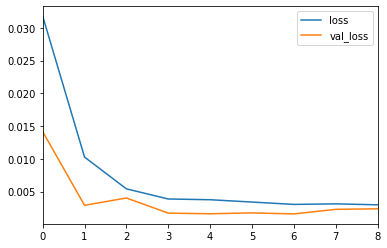

In [48]:
### loss comparision'

pd.DataFrame(model.history.history).plot()

In [49]:
predictions = []
new_batch = scaled_train[-length:]
new_batch = new_batch.reshape(1,length,1)
for i in range(len(test)):
    cur_pred = model.predict(new_batch)[0]
    predictions.append(cur_pred)
    
    new_batch = np.append(new_batch[:,1:,:],[[cur_pred]],axis=1)



C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


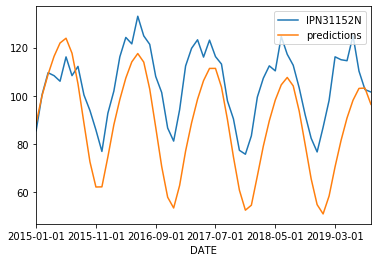

In [50]:
true_predictions = scaler.inverse_transform(predictions)

test["predictions"] = true_predictions

test.plot()

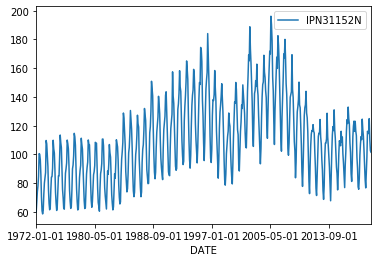

In [51]:
df.plot()

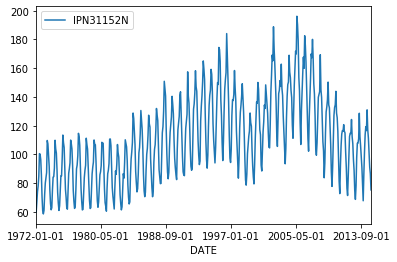

In [52]:
train.plot()

Epoch 1/10
498/498 [==============================] - 77s 154ms/step - loss: 0.0283 - val_loss: 0.0043
Epoch 2/10
498/498 [==============================] - 92s 185ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 3/10
498/498 [==============================] - 79s 158ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 4/10
498/498 [==============================] - 68s 137ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 5/10
498/498 [==============================] - 82s 164ms/step - loss: 0.0050 - val_loss: 0.0030


C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


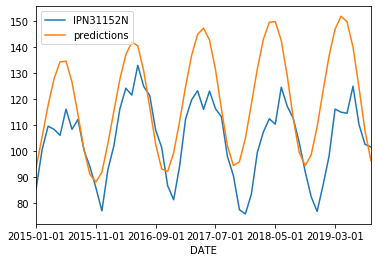

In [54]:
### adding dropout layer, activation = tanh 

model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape = (length,1)))
model.add(Dropout(0.2))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,validation_data = (test_generator),epochs = 10,
                   callbacks = [early_stop])

predictions = []
new_batch = scaled_train[-length:]
new_batch = new_batch.reshape(1,length,1)
for i in range(len(test)):
    cur_pred = model.predict(new_batch)[0]
    predictions.append(cur_pred)
    
    new_batch = np.append(new_batch[:,1:,:],[[cur_pred]],axis=1)


true_predictions = scaler.inverse_transform(predictions)

test["predictions"] = true_predictions

test.plot()

Epoch 1/10
543/543 [==============================] - 63s 116ms/step - loss: 0.0274 - val_loss: 0.0028
Epoch 2/10
543/543 [==============================] - 62s 114ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 3/10
543/543 [==============================] - 63s 115ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 4/10
543/543 [==============================] - 62s 113ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 5/10
543/543 [==============================] - 62s 114ms/step - loss: 0.0061 - val_loss: 0.0024


C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


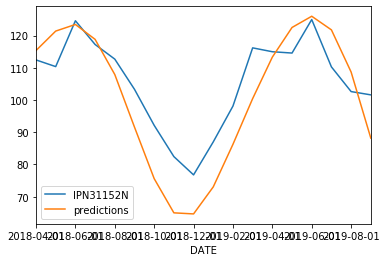

In [72]:
### adding dropout layer, increasing LSTM neurons, activation = tanh 

model = Sequential()
model.add(LSTM(200,activation='tanh',input_shape = (length,1)))
model.add(Dropout(0.5))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,validation_data = (test_generator),epochs = 10,
                   callbacks = [early_stop])

predictions = []
new_batch = scaled_train[-length:]
new_batch = new_batch.reshape(1,length,1)
for i in range(len(test)):
    cur_pred = model.predict(new_batch)[0]
    predictions.append(cur_pred)
    
    new_batch = np.append(new_batch[:,1:,:],[[cur_pred]],axis=1)


true_predictions = scaler.inverse_transform(predictions)

test["predictions"] = true_predictions

test.plot()

In [73]:
### RMSE
right_answer = scaler.inverse_transform(scaled_test)
for i in range(len(right_answer)):
    print(right_answer[i],true_predictions[i])
    

[112.4309] [115.34618165]
[110.3544] [121.37834707]
[124.5841] [123.43207028]
[117.2215] [118.81091848]
[112.6779] [107.89996172]
[103.3118] [91.58331807]
[92.1321] [75.60146014]
[82.4347] [64.98348302]
[76.7608] [64.65025667]
[86.9988] [73.03674868]
[98.1116] [86.24888716]
[116.1718] [100.42910321]
[114.9703] [113.30353188]
[114.5613] [122.50105816]
[124.9605] [125.98173712]
[110.2632] [121.75120436]
[102.6085] [108.66879034]
[101.5866] [88.16982555]


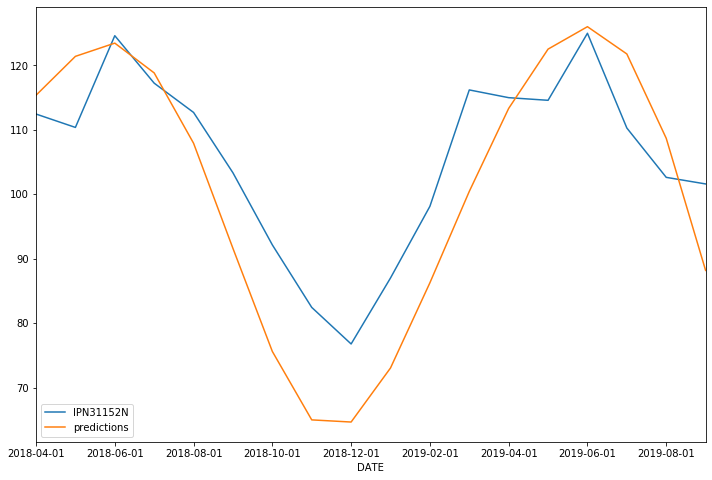

In [77]:
test.plot(figsize=(12,8))


In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
print(mean_squared_error(right_answer,true_predictions))

112.1002948239462


In [80]:
print(np.sqrt(mean_squared_error(right_answer,true_predictions)))

10.587742668951972
